# **INTENT CLASSIFICATION USING ATIS DATASET FOR NATURAL LANGUAGE UNDERSTANDING**


---



**Goal:**

This project aims to classify user intent from queries using machine learning models, which is essential for applications like chatbots and virtual assistants.

**Dataset:**

In this project the ATIS dataset is used, which contains user queries related to airline travel, to train and evaluate the models.

**Models Used:**

**Traditional/Baseline Models:**
- Naive Bayes
- Logistic Regression

**Deep Learning Models:**
- Convolutional Neural Networks (CNN)
- BERT (Bidirectional Encoder Representations from Transformers)

**Pipeline:**

- Data Preprocessing: the data is cleaned and prepared before loading into the models for training.
- Model Training: The dataset is trained on both traditional and deep learning models.
- Evaluation: The models are evaluated anf their performance are compared based on accuracy and F1 score.
- Results: The results show that BERT outperforms the other models, offering high accuracy and F1 scores.

**Purpose:**

The project highlights the strengths of using advanced deep learning models like BERT for intent classification tasks while also demonstrating the value of baseline models like Naive Bayes and Logistic Regression for comparison.

# Installing Packages

In [1]:
!pip install datasets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.4 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [2]:
!pip install nltk


In [3]:
!pip install tensorflow


In [4]:
# Download the GloVe embeddings (this may take a while)
!wget http://nlp.stanford.edu/data/glove.6B.zip


--2024-12-13 01:32:48--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2024-12-13 01:32:48--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-12-13 01:32:48--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [5]:
# Unzip the downloaded file
!unzip glove.6B.zip


Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [6]:
!pip install transformers


In [7]:
!pip install torch


# Importing packages

In [28]:
# Import required libraries
from sklearn.preprocessing import LabelEncoder
from datasets import load_dataset
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import nltk
import re
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from scipy import spatial

import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Sequential

import torch
from transformers import BertTokenizer, BertForSequenceClassification, AdamW, get_scheduler
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm


nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
# ds = load_dataset("pfsv/atis_json")
# print(ds)


In [10]:
# train_dataset = load_dataset("pfsv/atis_json", split="train")
# print(train_dataset)
# valid_dataset = load_dataset("pfsv/atis_json", split="validation")
# print(valid_dataset)
# test_dataset = load_dataset("pfsv/atis_json", split="test")
# print(test_dataset)


In [11]:
# # Function to flatten and save each split as a CSV file
# def save_split_to_csv(dataset_split, filename):
#     # Convert the Hugging Face Dataset split to a Pandas DataFrame
#     df = pd.DataFrame(dataset_split)
#     # Save the DataFrame to a CSV file
#     df.to_csv(filename, index=False)

# # Save each split to a separate CSV file
# save_split_to_csv(ds["train"], "atis_train.csv")
# save_split_to_csv(ds["validation"], "atis_validation.csv")
# save_split_to_csv(ds["test"], "atis_test.csv")

# print("CSV files have been saved!")


# Loading the data

In [12]:
# Loading the dataset
train_df = pd.read_csv("/content/atis_train.csv")
valid_df = pd.read_csv("/content/atis_validation.csv")
test_df = pd.read_csv("/content/atis_test.csv")


In [13]:
# print(train_df.head())
# print(valid_df.head())
# print(test_df.head())
train_df.head()


,intent,utterance,slots
0,abbreviation,what is fare code qw,O O O O B-fare_basis_code
1,abbreviation,what is fare code f,O O O O B-fare_basis_code
2,abbreviation,show me what fare codes symbols stand for,O O O O O O O O
3,abbreviation,what is ff,O O B-airline_code
4,abbreviation,what does code y mean,O O O B-fare_basis_code O


# Intent Classification



In [14]:
train_df.intent.value_counts()


,count
intent,
flight,3226
airfare,372
ground_service,224
airline,138
abbreviation,129
aircraft,71
flight_time,48
quantity,45
distance,18


In [15]:
test_df.intent.value_counts()


,count
intent,
flight,632
airfare,48
airline,39
ground_service,36
abbreviation,33
capacity,21
airport,18
flight+airfare,13
distance,10


## Preprocessing


- **Tokenization:**
The utterances are tokenized by splitting the text into words.
- **Text Normalization:**
It removes stop words to focus on the most relevant words.
- **TF-IDF Vectorization:**
Converts text into numerical form using the Term Frequency-Inverse Document Frequency (TF-IDF) method, limited to 5000 features.
- **Label Encoding:**
The labels (intents) are converted into numerical values using LabelEncoder.

In [16]:
# Tokenize the 'utterance' column for train set, val set and test set
# Convert to lowercase and split into words
train_df['utterance_tokens'] = train_df['utterance'].str.lower().str.split()
valid_df['utterance_tokens'] = valid_df['utterance'].str.lower().str.split()
test_df['utterance_tokens'] = test_df['utterance'].str.lower().str.split()


In [17]:
# Text Normalization: remove stop words
# Define stop words
stop_words = set(stopwords.words('english'))

# Function to normalize text
def normalize_text(text):
    """
    Normalize the input text by converting to lowercase and removing stop words.
    """
    # Convert text to lowercase and split into tokens (words)
    tokens = text.lower().split()
    # Remove stop words
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return filtered_tokens

# Apply normalization to the 'utterance' column in training set, validation set and test set
train_df['normalized_utterance'] = train_df['utterance'].apply(normalize_text)
valid_df['normalized_utterance'] = valid_df['utterance'].apply(normalize_text)
test_df['normalized_utterance'] = test_df['utterance'].apply(normalize_text)


In [18]:
# Apply TF-IDF vectorizer
# Limit the number of features to 5000
tfidf = TfidfVectorizer(max_features=5000)
# Fit and transform the training data
X_train_tfidf = tfidf.fit_transform(train_df['normalized_utterance'].apply(' '.join))
# Transform validation data
X_valid_tfidf = tfidf.transform(valid_df['normalized_utterance'].apply(' '.join))
# Transform test data
X_test_tfidf = tfidf.transform(test_df['normalized_utterance'].apply(' '.join))


In [19]:
# Initialize LabelEncoder
# Encoder for converting categorical labels into numerical values
label_encoder = LabelEncoder()
# Fit the encoder on the 'intent' column in the training set
label_encoder.fit(train_df['intent'])

# Transform the 'intent' column for all datasets
# Encode training labels
y_train = label_encoder.transform(train_df['intent'])
# Encode validation labels
y_valid = label_encoder.transform(valid_df['intent'])
# Encode test labels
y_test = label_encoder.transform(test_df['intent'])


In [20]:
# Print the shapes of the training, validation and test labels
print(y_train.shape)
print(y_valid.shape)
print(y_test.shape)


(4375,)
(597,)
(895,)


In [21]:
train_df.head()


,intent,utterance,slots,utterance_tokens,normalized_utterance
0,abbreviation,what is fare code qw,O O O O B-fare_basis_code,"[what, is, fare, code, qw]","[fare, code, qw]"
1,abbreviation,what is fare code f,O O O O B-fare_basis_code,"[what, is, fare, code, f]","[fare, code, f]"
2,abbreviation,show me what fare codes symbols stand for,O O O O O O O O,"[show, me, what, fare, codes, symbols, stand, ...","[show, fare, codes, symbols, stand]"
3,abbreviation,what is ff,O O B-airline_code,"[what, is, ff]",[ff]
4,abbreviation,what does code y mean,O O O B-fare_basis_code O,"[what, does, code, y, mean]","[code, mean]"


## Traditional/ Baseline Models
## Training for Intent Classification


### Multinomial Naive Bayes

- The Multinomial Naive Bayes model is trained using the TF-IDF features, followed by predictions on the test set.
- Accuracy, F1 Score and classification reports are generated, and confusion matrices are plotted.
- A validation function evaluates predictions during the training process.

In [22]:
# Initialize the Multinomial Naive Bayes classifier
nb_model = MultinomialNB()

# Train the model using the training data
nb_model.fit(X_train_tfidf, y_train)

# Predict on the test set
y_test_pred = nb_model.predict(X_test_tfidf)

# Test accuracy
# Calculate accuracy by comparing predictions with actual labels
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")


Test Accuracy: 0.7978


In [23]:
# Test classification report: Outputs with precision, recall, and F1-score
print(classification_report(y_test, y_test_pred, target_names=label_encoder.classes_))


                precision    recall  f1-score   support

  abbreviation       1.00      0.79      0.88        33
      aircraft       0.22      0.44      0.30         9
       airfare       0.67      0.21      0.32        48
       airline       1.00      0.18      0.30        39
       airport       0.00      0.00      0.00        18
      capacity       0.00      0.00      0.00        21
          city       0.00      0.00      0.00         6
      distance       0.00      0.00      0.00        10
        flight       0.80      1.00      0.89       632
flight+airfare       0.00      0.00      0.00        13
     flight_no       0.00      0.00      0.00         8
   flight_time       0.00      0.00      0.00         1
   ground_fare       0.00      0.00      0.00         7
ground_service       0.92      0.97      0.95        36
          meal       0.00      0.00      0.00         6
      quantity       0.00      0.00      0.00         3
   restriction       0.00      0.00      0.00  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [24]:
# Validation Step

def nbModel_validation(nb_model, X_train_tfidf, y_train):
    """
    Validate the Naive Bayes model by predicting labels and counting correct predictions.

    Parameters:
    nb_model (sklearn.naive_bayes.MultinomialNB): Trained Naive Bayes model.
    X_train_tfidf (scipy.sparse.csr.csr_matrix): TF-IDF transformed feature set.
    y_train (numpy.ndarray): True labels for the dataset.
    """
    # Predict the labels of the training set
    y_pred = nb_model.predict(X_train_tfidf)  # Get predicted labels for the training data

    # Count the number of correct predictions
    n_correct = 0  # Initialize counter for correct predictions
    for i in range(len(y_train)):
        if y_pred[i] == y_train[i]:  # Check if the predicted label matches the actual label
            n_correct += 1  # Increment counter if the prediction is correct

    # Output the number of correct predictions
    print("Predicted {0} correctly out of {1} training examples".format(n_correct, len(y_train)))

# Validate the model on training and test sets
nbModel_validation(nb_model, X_train_tfidf, y_train)  # Validation on training data
nbModel_validation(nb_model, X_test_tfidf, y_test)  # Validation on test data


Predicted 3790 correctly out of 4375 training examples
Predicted 714 correctly out of 895 training examples


In [25]:
# Function to predict and compare the class for an input from the preprocessed test set
def predict_and_compare_from_test(nb_model, X_test, y_test, test_df, label_encoder, index):
    """
    Predict the class for a specific input from the test set and compare it with the actual class.

    Parameters:
    nb_model (sklearn.naive_bayes.MultinomialNB): Trained Naive Bayes model.
    X_test (scipy.sparse.csr.csr_matrix): TF-IDF transformed feature set for the test data.
    y_test (numpy.ndarray): True labels for the test set.
    test_df (pandas.DataFrame): DataFrame containing the raw test data with 'utterance' column.
    label_encoder (sklearn.preprocessing.LabelEncoder): LabelEncoder to convert labels back to class names.
    index (int): Index of the input sample to predict and compare.
    """
    # Extract the raw utterance, input vectorized, and the actual label from the test set
    utterance = test_df['utterance'].iloc[index]  # Get the raw input utterance
    input_vectorized = X_test[index]  # Get the vectorized representation of the input
    actual_label_index = y_test[index]  # Get the actual class label index for the sample

    # Predict the class for the input using the trained Naive Bayes model
    predicted_class_index = nb_model.predict(input_vectorized)[0]  # Get the predicted class index
    predicted_class = label_encoder.inverse_transform([predicted_class_index])[0]  # Convert index to class name
    actual_class = label_encoder.inverse_transform([actual_label_index])[0]  # Convert actual label index to class name

    # Print the results: utterance, predicted class, and actual class
    print(f"Utterance: {utterance}")
    print(f"Predicted Class: {predicted_class}")
    print(f"Actual Class: {actual_class}")

# Example usage: Select an index from the preprocessed test set
example_index = 34  # Choose an index from the test data

# Call the function to predict and compare the class
predict_and_compare_from_test(
    nb_model=nb_model,
    X_test=X_test_tfidf,
    y_test=y_test,
    test_df=test_df,
    label_encoder=label_encoder,
    index=example_index
)


Utterance: determine the type of aircraft used on a flight from cleveland to dallas that leaves before noon
Predicted Class: flight
Actual Class: aircraft


In [26]:
# Function to predict and compare the input's predicted and actual class
def predict_and_compare(nb_model, input_text, label_encoder, vectorizer, actual_label=None):
    """
    Predicts the class for the input text and compares it with the actual class if provided.

    Parameters:
    nb_model (sklearn.naive_bayes.MultinomialNB): Trained Naive Bayes model.
    input_text (str): The text input to predict the class for.
    label_encoder (sklearn.preprocessing.LabelEncoder): LabelEncoder to decode predicted class index into class name.
    vectorizer (sklearn.feature_extraction.text.TfidfVectorizer): The vectorizer used to transform the text.
    """

    # Transform the input text using the same vectorizer used during training
    input_vectorized = vectorizer.transform([input_text])

    # Predict the class for the input
    predicted_class_index = nb_model.predict(input_vectorized)[0]
    predicted_class = label_encoder.inverse_transform([predicted_class_index])[0]

    # Print the input and predicted class
    print(f"Input: {input_text}")  # Display the input text provided by the user
    print(f"Predicted Class: {predicted_class}")  # Display the predicted class

# Assuming the test set's first sample and its actual label:
example_input = "how far is toronto international from downtown"
example_label = y_test[0]

predict_and_compare(
    nb_model=nb_model,
    input_text=example_input,
    label_encoder=label_encoder,
    vectorizer=tfidf,
    actual_label=example_label
)


Input: how far is toronto international from downtown
Predicted Class: flight


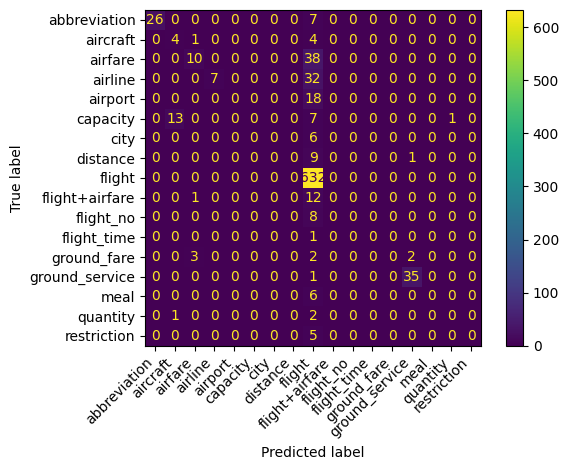

In [30]:
# Generate the confusion matrix
# Compare true labels and predicted labels for the test set
conf_matrix_nb = confusion_matrix(y_test, y_test_pred)
# Displays the confusion matrix in a visual format
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_nb, display_labels=label_encoder.classes_)
disp.plot(cmap='viridis')

# Rotate the x-axis labels
plt.xticks(rotation=45, ha='right')  # Rotate labels and align to the right
plt.tight_layout()  # Adjust layout to fit rotated labels
plt.show()


### Logistic Regression

- Similar to the Naive Bayes model, Logistic Regression is trained, and performance metrics like accuracy score and F1 score are displayed.
- A validation step is also included.

In [31]:
# Logistic Regression Model
# Initialize Logistic Regression with 1000 iterations for convergence
logreg_model = LogisticRegression(max_iter=1000)

# Train the model on the training data
logreg_model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred_logreg = logreg_model.predict(X_test_tfidf)


In [32]:
# Print the classification report for the Logistic Regression model
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.79      0.88        33
           1       0.47      1.00      0.64         9
           2       0.88      0.88      0.88        48
           3       1.00      0.77      0.87        39
           4       1.00      0.11      0.20        18
           5       0.00      0.00      0.00        21
           6       0.00      0.00      0.00         6
           7       1.00      0.10      0.18        10
           8       0.87      0.99      0.93       632
           9       0.00      0.00      0.00        13
          10       0.00      0.00      0.00         8
          11       0.00      0.00      0.00         1
          12       1.00      0.57      0.73         7
          13       0.97      0.97      0.97        36
          14       0.00      0.00      0.00         6
          15       0.50      1.00      0.67         3
          16       0.00      0.00     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [33]:
# Validation Step for Logistic Regression Model
def logregModel_validation(logreg_model, X_train_tfidf, y_train):
    """
    Validate the Logistic Regression model by predicting the labels on the given data and counting correct predictions.

    Parameters:
    logreg_model: Trained Logistic Regression model.
    X_train_tfidf: Feature matrix (TF-IDF transformed) for the training data.
    y_train: True labels for the training data.
    """

    # Predict the labels for the training data
    y_pred_logreg = logreg_model.predict(X_train_tfidf)

    # Initialize counter for correct predictions
    n_correct = 0
    for i in range(len(y_train)):
        if y_pred_logreg[i] == y_train[i]:
            n_correct += 1

    # Output the number of correct predictions
    print("Predicted {0} correctly out of {1} training examples".format(n_correct, len(y_train)))

# Validate the model on both training and test datasets
# Training set validation
logregModel_validation(logreg_model, X_train_tfidf, y_train)
# Test set validation
logregModel_validation(logreg_model, X_test_tfidf, y_test)


Predicted 4123 correctly out of 4375 training examples
Predicted 780 correctly out of 895 training examples


In [34]:
# Function to predict and compare the class for an input from the preprocessed test set
def predict_and_compare_from_test(model, X_test, y_test, test_df, label_encoder, index):
    """
    Predict the class for a specific input from the test set and compare it with the actual class.

    Args:
        model: The trained classification model (Logistic Regression).
        X_test: The test set features (vectorized input data).
        y_test: The true labels for the test set.
        test_df: The DataFrame containing the raw test set data.
        label_encoder: The LabelEncoder object used to encode labels.
        index: The index of the input to predict and compare.

    Returns:
        None
    """
    # Extract the raw utterance from the test DataFrame using the provided index
    utterance = test_df['utterance'].iloc[index]

    # Get the vectorized input corresponding to the given index
    input_vectorized = X_test[index]

    # Get the actual label index from the test set labels
    actual_label_index = y_test[index]

    # Predict the class for the input using the model
    predicted_class_index = model.predict(input_vectorized)[0]

    # Convert the predicted label index back to its original class label
    predicted_class = label_encoder.inverse_transform([predicted_class_index])[0]

    # Convert the actual label index to its original class label
    actual_class = label_encoder.inverse_transform([actual_label_index])[0]

    # Print the results: the input utterance, predicted class, and actual class
    print(f"Utterance: {utterance}")
    print(f"Predicted Class: {predicted_class}")
    print(f"Actual Class: {actual_class}")

# Example usage: Select an index from the preprocessed test set
example_index = 34

# Call the function to predict and compare for the selected test example
predict_and_compare_from_test(
    model=logreg_model,
    X_test=X_test_tfidf,
    y_test=y_test,
    test_df=test_df,
    label_encoder=label_encoder,
    index=example_index
)


Utterance: determine the type of aircraft used on a flight from cleveland to dallas that leaves before noon
Predicted Class: aircraft
Actual Class: aircraft


In [35]:
# Function to predict and compare the input's predicted and actual class
def predict_and_compare(logreg_model, input_text, label_encoder, vectorizer, actual_label=None):
    """
    Predicts the class for the input text and compares it with the actual class if provided.

    Parameters:
    model: Trained Logistic Regression model.
    input_text (str): The text input to predict the class for.
    label_encoder (sklearn.preprocessing.LabelEncoder): LabelEncoder to decode predicted class index into class name.
    vectorizer (sklearn.feature_extraction.text.TfidfVectorizer): The vectorizer used to transform the text.
    """

    # Transform the input text using the same vectorizer used during training
    input_vectorized = vectorizer.transform([input_text])

    # Predict the class for the input
    predicted_class_index = logreg_model.predict(input_vectorized)[0]
    predicted_class = label_encoder.inverse_transform([predicted_class_index])[0]

    # Print the input and predicted class
    print(f"Input: {input_text}")  # Display the input text provided by the user
    print(f"Predicted Class: {predicted_class}")  # Display the predicted class

# Assuming the test set's first sample and its actual label:
example_input = "how far is toronto international from downtown"
example_label = y_test[0]

predict_and_compare(
    logreg_model=logreg_model,
    input_text=example_input,
    label_encoder=label_encoder,
    vectorizer=tfidf,
    actual_label=example_label
)


Input: how far is toronto international from downtown
Predicted Class: flight


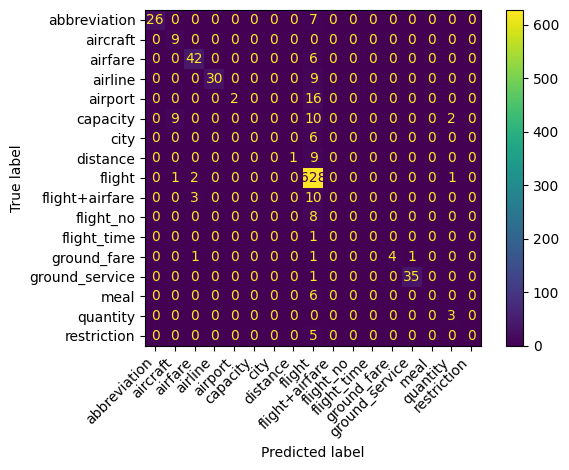

In [36]:
# Generate the confusion matrix
# Compare true labels and predicted labels for the test set
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
# Displays the confusion matrix in a visual format
disp_logreg = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_logreg, display_labels=label_encoder.classes_)
disp_logreg.plot(cmap='viridis')

# Rotate the x-axis labels
plt.xticks(rotation=45, ha='right')  # Rotate labels and align to the right
plt.tight_layout()  # Adjust layout to fit rotated labels
plt.show()


# CNN for Intent Classification

## Preprocessing for CNN

**Text Preprocessing for CNN:**
- Text is tokenized and converted to sequences.
- Word embeddings (GloVe 300-dimensional vectors) are used to padded the sequences to a consistent length.

In [37]:
# Tokenize the text data using Tokenizer
tok = Tokenizer()
# Fit the tokenizer on the training data
tok.fit_on_texts(train_df['normalized_utterance'])
# Get the word index mapping for all tokens in the training set
word_index = tok.word_index


In [38]:
# Define max_vocab_size and input_length
# Set the vocabulary size based on the word index size
max_vocab_size = len(word_index) + 1
print(max_vocab_size)
# The maximum sequence length for input
input_length = 30


769


In [39]:
# Convert train, validation and test utterances to token sequences
train_data_tokens = tok.texts_to_sequences(train_df['normalized_utterance'])
valid_data_tokens = tok.texts_to_sequences(valid_df['normalized_utterance'])
test_data_tokens = tok.texts_to_sequences(test_df['normalized_utterance'])


In [40]:
# Pad sequences to ensure consistent input size
# Pad training sequences to the fixed length
train_input = pad_sequences(train_data_tokens, maxlen=input_length)
print(train_input)
# Pad validation sequences
valid_input = pad_sequences(valid_data_tokens, maxlen=input_length)
print(valid_input)
# Pad test sequences
test_input = pad_sequences(test_data_tokens, maxlen=input_length)
print(test_input)


[[  0   0   0 ...  23  99 321]
 [  0   0   0 ...  23  99 266]
 [  0   0   0 ... 292 526 225]
 ...
 [  0   0   0 ... 227 768 129]
 [  0   0   0 ...   0 214 389]
 [  0   0   0 ...  23   4  25]]
[[  0   0   0 ...  99 347 130]
 [  0   0   0 ... 250 296 130]
 [  0   0   0 ...  23  99 266]
 ...
 [  0   0   0 ...  93 429  33]
 [  0   0   0 ...  17 192 244]
 [  0   0   0 ...   0  70 214]]
[[  0   0   0 ...   0 161  99]
 [  0   0   0 ...   0  23  99]
 [  0   0   0 ...  23  99 266]
 ...
 [  0   0   0 ...   0 525 283]
 [  0   0   0 ...   0 525   1]
 [  0   0   0 ...   1  41  46]]


In [41]:
# Print the shape of the padded training,validation and testing input
print(train_input.shape)
print(valid_input.shape)
print(test_input.shape)


(4375, 30)
(597, 30)
(895, 30)


In [42]:
# One-hot encode the training, validation and testing labels
y_train = to_categorical(y_train)
y_valid = to_categorical(y_valid)
y_test = to_categorical(y_test)


In [43]:
# Print the shape of the one-hot encoded training, validation and testing labels labels
print(y_train.shape)
print(y_valid.shape)
print(y_test.shape)


(4375, 17)
(597, 17)
(895, 17)


In [44]:
# Load GloVe embeddings (300-dimensional)
embedding_dim = 300  # The dimensionality of the GloVe embeddings
embedding_index = {}  # Initialize an empty dictionary to store word embeddings

# Load the GloVe embeddings from the file and store them in the embedding index
with open("glove.6B.300d.txt", 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()  # Split the line into words and corresponding values
        word = values[0]  # The word is the first element in the line
        coefs = np.asarray(values[1:], dtype='float32')  # The remaining elements are the word's embedding
        embedding_index[word] = coefs  # Store the word and its embedding in the index

# Print the total number of word vectors loaded
print(f"Loaded {len(embedding_index)} word vectors.")


Loaded 400000 word vectors.


In [45]:
# Prepare the embedding matrix
vocab_size = len(word_index) + 1  # +1 for the padding token
embedding_matrix = np.zeros((vocab_size, embedding_dim))  # Initialize with zeros

for word, i in word_index.items():
    # If the word has a GloVe vector and the index is within the vocabulary size
    if i < vocab_size and word in embedding_index:
        embedding_matrix[i] = embedding_index[word]  # Assign the GloVe vector


## Model Training for CNN

**CNN Model:**
- The CNN model is built with an embedding layer, convolutional and pooling layers, and fully connected layers.
- The model is trained and evaluated on the test set.
- Performance is measured using accuracy, F1 Score and confusion matrices.

In [46]:
# Define the CNN model
model = Sequential()
# Embedding layer: Maps input indices to pre-trained GloVe embeddings
model.add(Embedding(input_dim=vocab_size,
                    output_dim=embedding_dim,
                    weights=[embedding_matrix],  # Pre-trained embeddings
                    input_length=input_length,   # Maximum sequence length
                    trainable=False))  # Freeze the embedding layer
# 1D Convolutional layer: Extracts features using convolutional filters
model.add(Conv1D(filters=32, kernel_size=8, activation='relu'))
# Max pooling layer: Downsamples the feature maps
model.add(MaxPooling1D(pool_size=2))
# Flatten layer: Flattens the feature maps into a 1D vector
model.add(Flatten())
# Fully connected (dense) layer: Hidden layer for learning complex representations
model.add(Dense(10, activation='relu'))
# Output layer: Softmax activation for multi-class classification
model.add(Dense(y_train.shape[1], activation='softmax'))

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │         230,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 230,700 (901.17 KB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 230,700 (901.17 KB)

In [47]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [48]:
# Train the model
model.fit(train_input, y_train, validation_data=(valid_input, y_valid), epochs=10, batch_size=32)


Epoch 1/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - accuracy: 0.6605 - loss: 1.5431 - val_accuracy: 0.8543 - val_loss: 0.5903
Epoch 2/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8702 - loss: 0.5014 - val_accuracy: 0.8928 - val_loss: 0.4480
Epoch 3/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9035 - loss: 0.3673 - val_accuracy: 0.9280 - val_loss: 0.3414
Epoch 4/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9492 - loss: 0.2183 - val_accuracy: 0.9363 - val_loss: 0.2862
Epoch 5/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9657 - loss: 0.1403 - val_accuracy: 0.9347 - val_loss: 0.2657
Epoch 6/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9747 - loss: 0.1070 - val_accuracy: 0.9414 - val_loss: 0.2416
Epoch 7/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9804 - loss: 0.0783 - val_accuracy: 0.9363 - val_loss: 0.2789
Epoch 8/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9858 - loss: 0.0578 - val_accuracy: 

In [49]:
#  Evaluate on the test set:
model.evaluate(test_input, y_test)


28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9058 - loss: 0.4861


[0.450644314289093, 0.9072625637054443]

In [50]:
#  Evaluate on the train set:
model.evaluate(train_input, y_train)


137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9940 - loss: 0.0420


[0.030114054679870605, 0.9938285946846008]

In [51]:
#  Evaluate on the validation set:
model.evaluate(valid_input, y_valid)


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9217 - loss: 0.3711 


[0.24329441785812378, 0.94807368516922]

In [52]:
# Function to calculate accuracy of predictions
def acc(y_true, y_pred_cnn):
    """
    Calculate the accuracy of predictions by comparing true and predicted class labels.

    Args:
        y_true (np.ndarray): True labels in one-hot encoding format.
        y_pred_cnn (np.ndarray): Predicted probabilities in one-hot encoding format.

    Returns:
        float: Accuracy as the mean of correct predictions.
    """
    return np.equal(np.argmax(y_true, axis=-1), np.argmax(y_pred_cnn, axis=-1)).mean()


In [53]:
# Make predictions on the test set
predictions = model.predict(test_input)

# Compute and print accuracy
print(acc(y_test, predictions))


28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
0.9072625698324023


In [54]:
# Convert predictions to class labels
y_pred_cnn = np.argmax(predictions, axis=-1)  # Predicted class labels
y_test_class = np.argmax(y_test, axis=-1)  # True class labels

# Print the classification report
print("Classification Report for CNN Model:")
print(classification_report(y_test_class, y_pred_cnn, target_names=label_encoder.classes_))


Classification Report for CNN Model:
                precision    recall  f1-score   support

  abbreviation       0.65      1.00      0.79        33
      aircraft       0.75      0.67      0.71         9
       airfare       0.90      0.98      0.94        48
       airline       0.88      0.72      0.79        39
       airport       0.88      0.39      0.54        18
      capacity       0.95      0.86      0.90        21
          city       0.60      0.50      0.55         6
      distance       0.67      0.20      0.31        10
        flight       0.94      0.98      0.96       632
flight+airfare       1.00      0.08      0.14        13
     flight_no       0.00      0.00      0.00         8
   flight_time       1.00      1.00      1.00         1
   ground_fare       1.00      0.71      0.83         7
ground_service       0.92      1.00      0.96        36
          meal       0.00      0.00      0.00         6
      quantity       0.33      1.00      0.50         3
   restric

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Confusion Matrix for CNN Model:
[[ 33   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  2   6   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0]
 [  0   0  47   0   0   0   0   0   1   0   0   0   0   0   0   0   0]
 [  8   0   0  28   0   0   0   0   3   0   0   0   0   0   0   0   0]
 [  2   0   0   0   7   0   0   1   7   0   0   0   0   1   0   0   0]
 [  1   1   0   0   0  18   0   0   1   0   0   0   0   0   0   0   0]
 [  2   0   0   0   0   0   3   0   1   0   0   0   0   0   0   0   0]
 [  0   0   1   0   1   0   1   2   5   0   0   0   0   0   0   0   0]
 [  0   1   0   4   0   0   0   0 622   0   0   0   0   1   0   4   0]
 [  0   0   2   0   0   0   0   0  10   1   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   7   0   0   0   0   0   0   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0]
 [  0   0   1   0   0   0   0   0   0   0   0   0   5   1   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0

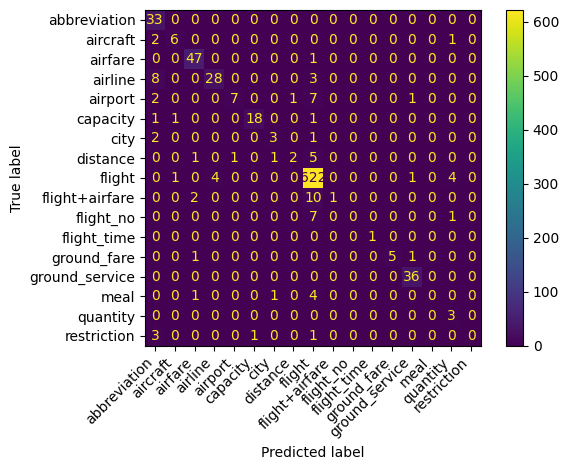

In [55]:
# Compute the confusion matrix
conf_matrix_cnn = confusion_matrix(y_test_class, y_pred_cnn)

# Print the confusion matrix
print("Confusion Matrix for CNN Model:")
print(conf_matrix_cnn)

# Visualize the confusion matrix
disp_cnn = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_cnn, display_labels=label_encoder.classes_)
disp_cnn.plot(cmap='viridis')

# Rotate the x-axis labels
plt.xticks(rotation=45, ha='right')  # Rotate labels and align to the right
plt.tight_layout()  # Adjust layout to fit rotated labels
plt.show()


In [56]:
# Function to predict and compare an input sample's predicted and actual class
def predict_and_compare_from_test_cnn(model, X_test, y_test, test_df, label_encoder, index):
    """
    Predict and compare the class for a single input sample from the test set.

    Args:
        model (keras.Model): Trained CNN model for predictions.
        X_test (np.ndarray): Preprocessed test input data.
        y_test (np.ndarray): True labels in one-hot encoding format.
        test_df (pd.DataFrame): Original test dataframe containing raw text data.
        label_encoder (LabelEncoder): Encoder to map class indices to labels.
        index (int): Index of the input sample in the test set.

    Returns:
        None: Prints the utterance, predicted class, and actual class.
    """
    # Extract the raw utterance, vectorized input, and true label
    utterance = test_df['utterance'].iloc[index]
    input_vectorized = X_test[index]
    actual_label_index = y_test[index]

    # Predict the class probabilities for the input
    prediction_probs = model.predict(np.expand_dims(input_vectorized, axis=0))  # Expand dims to simulate batch input
    predicted_class_index = np.argmax(prediction_probs, axis=-1)[0]  # Get the predicted class index

    # Decode predicted and actual class indices to labels
    predicted_class = label_encoder.inverse_transform([predicted_class_index])[0]
    actual_class = label_encoder.inverse_transform([np.argmax(actual_label_index)])[0]

    # Print details of the prediction
    print(f"Utterance: {utterance}")
    print(f"Predicted Class: {predicted_class}")
    print(f"Actual Class: {actual_class}")

# Example usage: Select a sample from the test set
example_index = 100  # Replace with a specific index as needed

# Predict and compare the sample
predict_and_compare_from_test_cnn(
    model=model,
    X_test=test_input,
    y_test=y_test,
    test_df=test_df,
    label_encoder=label_encoder,
    index=example_index
)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step
Utterance: what is airline wn
Predicted Class: abbreviation
Actual Class: airline


In [57]:
def predict_and_compare_cnn(model, input_text, label_encoder, tokenizer, max_sequence_length, actual_label=None):
    """
    Predicts the class for the input text using a CNN model and compares it with the actual class if provided.

    Parameters:
    model (keras.Model): Trained CNN model.
    input_text (str): The text input to predict the class for.
    label_encoder (sklearn.preprocessing.LabelEncoder): LabelEncoder to decode predicted class index into class name.
    tokenizer (keras.preprocessing.text.Tokenizer): Tokenizer used to preprocess the text.
    max_sequence_length (int): Maximum sequence length for input padding.
    actual_label (int, optional): The actual class label index for comparison.

    Returns:
    None: Prints the input text, predicted class, and actual class (if provided).
    """
    # Transform the input text into tokens and pad sequences
    input_tokens = tokenizer.texts_to_sequences([input_text])
    input_padded = pad_sequences(input_tokens, maxlen=max_sequence_length)

    # Predict the class probabilities for the input
    prediction_probs = model.predict(input_padded)
    predicted_class_index = np.argmax(prediction_probs, axis=-1)[0]  # Get the predicted class index
    predicted_class = label_encoder.inverse_transform([predicted_class_index])[0]  # Decode predicted class index

    # Print the input text and predicted class
    print(f"Input: {input_text}")
    print(f"Predicted Class: {predicted_class}")

# Example usage
example_input = "are there any restrictions for children traveling alone on united airlines"

predict_and_compare_cnn(
    model=model,  # The trained CNN model
    input_text=example_input,
    label_encoder=label_encoder,
    tokenizer=tok,  # The tokenizer used for preprocessing
    max_sequence_length=input_length,  # The maximum sequence length used during training
)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Input: are there any restrictions for children traveling alone on united airlines
Predicted Class: capacity


# BERT for Intent Classification


- BERT (Bidirectional Encoder Representations from Transformers) is used for intent classification.
- The data is tokenized using BERT’s tokenizer and padded/truncated to a fixed length.
- The model is fine-tuned using the pre-trained BERT model for classification, with the optimizer and scheduler set up for training.
- The training loop for models like BERT includes optimization using AdamW and learning rate scheduling.
- The evaluation is performed after training to check the model's performance on both the validation and test sets.

## Pre-Trained BERT Model

In [58]:
# Load pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')
model = BertForSequenceClassification.from_pretrained('bert-base-cased', num_labels=len(label_encoder.classes_))


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [59]:
def encode_data(texts, tokenizer, max_length=30):
    """
    Encodes a list of text inputs using a BERT tokenizer.

    Parameters:
    texts (list of str): List of text inputs to tokenize.
    tokenizer (transformers.PreTrainedTokenizer): BERT tokenizer for encoding the text.
    max_length (int): Maximum sequence length for padding/truncation. Default is 30.

    Returns:
    dict: Encoded text as PyTorch tensors with input IDs, attention masks, and token types.
    """
    # Tokenize and pad the sequences to a consistent length
    return tokenizer(
        texts,
        padding=True,              # Add padding to make sequences uniform
        truncation=True,           # Truncate sequences longer than max_length
        max_length=max_length,     # Set the maximum sequence length
        return_tensors='pt'        # Return data as PyTorch tensors
    )

# Encode the training data
train_encodings = encode_data(train_df['utterance'].tolist(), tokenizer)
# Encode the validation data
valid_encodings = encode_data(valid_df['utterance'].tolist(), tokenizer)
# Encode the test data
test_encodings = encode_data(test_df['utterance'].tolist(), tokenizer)


In [60]:
# Prepare the labels
y_train_tensor = torch.tensor(y_train)
y_valid_tensor = torch.tensor(y_valid)
y_test_tensor = torch.tensor(y_test)


In [61]:
# Create DataLoader for batching
train_dataset = TensorDataset(train_encodings['input_ids'], train_encodings['attention_mask'], y_train_tensor)
valid_dataset = TensorDataset(valid_encodings['input_ids'], valid_encodings['attention_mask'], y_valid_tensor)
test_dataset = TensorDataset(test_encodings['input_ids'], test_encodings['attention_mask'], y_test_tensor)

# Create DataLoader for train, validation, and test sets
train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True)
valid_dataloader = DataLoader(valid_dataset, batch_size=16)
test_dataloader = DataLoader(test_dataset, batch_size=16)


In [62]:
# Define optimizer and learning rate scheduler
optimizer = AdamW(model.parameters(), lr=1e-5)


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [63]:
# Set the device to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

def train_model(model, train_dataloader, optimizer, device, epochs=6):
    """
    Train the model for a specified number of epochs.

    Parameters:
    model (transformers.PreTrainedModel): BERT model to be trained.
    train_dataloader (DataLoader): DataLoader for the training set.
    optimizer (torch.optim.Optimizer): Optimizer to update the model weights.
    device (torch.device): Device (CPU/GPU) for model training.
    epochs (int): Number of epochs for training.
    """
    model.train()  # Set model to training mode
    for epoch in range(epochs):
        total_loss = 0  # Initialize loss for the current epoch
        for batch in train_dataloader:
            input_ids, attention_mask, labels = [item.to(device) for item in batch]

            optimizer.zero_grad()  # Clear gradients from previous step

            # Forward pass
            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss  # Extract loss from output
            total_loss += loss.item()  # Accumulate loss

            loss.backward()  # Backpropagation
            optimizer.step()  # Update weights

        # Print average loss per epoch
        print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss / len(train_dataloader)}")

# Train the model
train_model(model, train_dataloader, optimizer, device)


Epoch 1/6, Loss: 0.23763034132216274
Epoch 2/6, Loss: 0.08649442498257491
Epoch 3/6, Loss: 0.05378312653006044
Epoch 4/6, Loss: 0.03887375785519944
Epoch 5/6, Loss: 0.029331236148427343
Epoch 6/6, Loss: 0.02347012597897397


In [64]:
def evaluate_model(model, dataloader, device):
    """
    Evaluate the model on a given dataset.

    Parameters:
    model (transformers.PreTrainedModel): Trained BERT model.
    dataloader (DataLoader): DataLoader for evaluation.
    device (torch.device): Device (CPU/GPU) for evaluation.

    Returns:
    tuple: Lists of true labels and predicted labels.
    """
    model.eval()  # Set model to evaluation mode
    all_preds = []
    all_labels = []

    with torch.no_grad():  # Disable gradient calculation for efficiency
        for batch in dataloader:
            input_ids, attention_mask, labels = [item.to(device) for item in batch]
            # Get logits from model
            outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            # Get predicted classes
            predictions = torch.argmax(logits, dim=-1)

            all_preds.extend(predictions.cpu().numpy())  # Convert to numpy and store
            # Convert one-hot labels to single digit labels
            all_labels.extend(torch.argmax(labels, dim=-1).cpu().numpy() if labels.dim() > 1 else labels.cpu().numpy())

    return all_labels, all_preds  # Return true and predicted labels

# Get predictions for the test set
y_test_labels, y_test_preds = evaluate_model(model, test_dataloader, device)


In [65]:
# Classification Report
print("Classification Report for BERT Model:")
print(classification_report(y_test_labels, y_test_preds, target_names=label_encoder.classes_))


Classification Report for BERT Model:
                precision    recall  f1-score   support

  abbreviation       1.00      1.00      1.00        33
      aircraft       0.62      0.89      0.73         9
       airfare       0.92      1.00      0.96        48
       airline       0.95      0.97      0.96        39
       airport       1.00      0.67      0.80        18
      capacity       0.00      0.00      0.00        21
          city       1.00      0.67      0.80         6
      distance       1.00      0.50      0.67        10
        flight       0.96      0.98      0.97       632
flight+airfare       0.00      0.00      0.00        13
     flight_no       0.00      0.00      0.00         8
   flight_time       0.08      1.00      0.14         1
   ground_fare       0.00      0.00      0.00         7
ground_service       0.73      1.00      0.85        36
          meal       0.00      0.00      0.00         6
      quantity       0.11      1.00      0.20         3
   restri

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


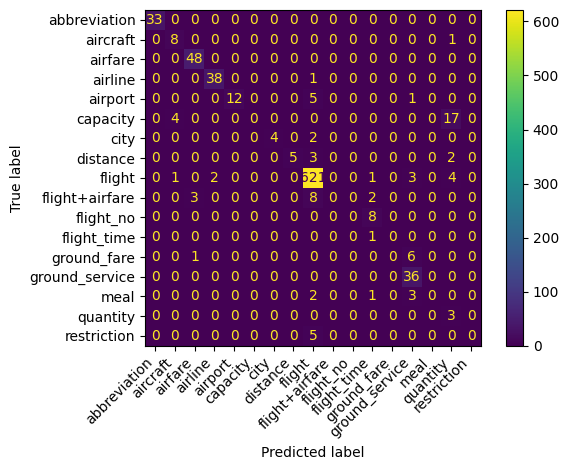

In [66]:
# Confusion Matrix
conf_matrix_bert = confusion_matrix(y_test_labels, y_test_preds)

# Display confusion matrix
disp_bert = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_bert, display_labels=label_encoder.classes_)
disp_bert.plot(cmap='viridis')

# Rotate the x-axis labels
plt.xticks(rotation=45, ha='right')  # Rotate labels and align to the right
plt.tight_layout()  # Adjust layout to fit rotated labels
plt.show()


In [67]:
def predict_and_compare_bert(model, input_text, label_encoder, tokenizer, max_sequence_length):
    """
    Predicts the class for the input text using a fine-tuned BERT model.

    Parameters:
    model (transformers.BertForSequenceClassification): Fine-tuned BERT model.
    input_text (str): The text input to predict the class for.
    label_encoder (sklearn.preprocessing.LabelEncoder): LabelEncoder to decode predicted class index into class name.
    tokenizer (transformers.BertTokenizer): BERT tokenizer for encoding the text.
    max_sequence_length (int): Maximum sequence length for input padding.
    """
    # 1. Tokenize and prepare input
    inputs = tokenizer(input_text, padding=True, truncation=True, max_length=max_sequence_length, return_tensors="pt")
    inputs = inputs.to(device)  # Move inputs to the device (GPU if available)

    # 2. Get model outputs (logits)
    with torch.no_grad():  # Disable gradient calculation for inference
        outputs = model(**inputs)
        logits = outputs.logits  # Get the raw output (logits)

    # 3. Apply argmax to get predicted class index
    predicted_class_index = logits.argmax().item()

    # 4. Decode predicted class index to class name
    predicted_class = label_encoder.inverse_transform([predicted_class_index])[0]

    # 5. Print the input and predicted class
    print(f"Input: {input_text}")
    print(f"Predicted Class: {predicted_class}")

# Example usage
example_input = "what meals are served on american flight 811 from tampa to milwaukee"

predict_and_compare_bert(
    model=model,
    input_text=example_input,
    label_encoder=label_encoder,
    tokenizer=tokenizer,
    max_sequence_length=128
)


Input: what meals are served on american flight 811 from tampa to milwaukee
Predicted Class: flight


## Fine-Tuned BERT Model

In [68]:
# Set device to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [69]:
# Load pre-trained BERT tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-cased")
model = BertForSequenceClassification.from_pretrained("bert-base-cased", num_labels=17)
model.to(device)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(28996, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [70]:
# Tokenize the data
def encode_data(texts, tokenizer, max_length=128):
    """
    Tokenize and pad the input texts to a consistent length.

    Args:
        texts (list): List of input texts to be tokenized.
        tokenizer (transformers.PreTrainedTokenizer): Tokenizer to convert text to input format.
        max_length (int): Maximum sequence length for padding/truncation.

    Returns:
        dict: Tokenized input with input_ids and attention_mask.
    """
    return tokenizer(texts, padding=True, truncation=True, max_length=max_length, return_tensors="pt")

# Tokenize training, validation, and test sets
train_encodings = encode_data(train_df["utterance"].tolist(), tokenizer)
valid_encodings = encode_data(valid_df["utterance"].tolist(), tokenizer)
test_encodings = encode_data(test_df["utterance"].tolist(), tokenizer)

# Convert labels to tensors
y_train_tensor = torch.tensor(y_train)
y_valid_tensor = torch.tensor(y_valid)
y_test_tensor = torch.tensor(y_test)


In [71]:
# Create DataLoader for batching
train_dataset = TensorDataset(train_encodings["input_ids"], train_encodings["attention_mask"], y_train_tensor)
valid_dataset = TensorDataset(valid_encodings["input_ids"], valid_encodings["attention_mask"], y_valid_tensor)
test_dataset = TensorDataset(test_encodings["input_ids"], test_encodings["attention_mask"], y_test_tensor)

# Define DataLoader for batching
train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True)
valid_dataloader = DataLoader(valid_dataset, batch_size=16)
test_dataloader = DataLoader(test_dataset, batch_size=16)


In [72]:
# Define optimizer and scheduler
optimizer = AdamW(model.parameters(), lr=2e-5)  # AdamW optimizer with learning rate
num_training_steps = len(train_dataloader) * 6  # Total training steps (3 epochs)
lr_scheduler = get_scheduler("linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=num_training_steps)


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [73]:
# Training loop
def train_model(model, train_dataloader, valid_dataloader, optimizer, scheduler, device, epochs=4):
    """
    Trains the model for a specified number of epochs.

    Args:
        model (transformers.PreTrainedModel): The BERT model to train.
        train_dataloader (DataLoader): Dataloader for training data.
        valid_dataloader (DataLoader): Dataloader for validation data.
        optimizer (torch.optim.Optimizer): Optimizer for model parameters.
        scheduler (transformers.get_scheduler): Scheduler to adjust the learning rate.
        device (torch.device): Device to run the model (CPU or GPU).
        epochs (int): Number of epochs to train.
    """
    model.train()  # Set model to training mode
    for epoch in range(epochs):
        print(f"Epoch {epoch + 1}/{epochs}")
        total_loss = 0  # Initialize total loss

        for batch in tqdm(train_dataloader, desc="Training"):
            input_ids, attention_mask, labels = [item.to(device) for item in batch]

            # Forward pass
            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            total_loss += loss.item()

            optimizer.zero_grad()  # Clear previous gradients
            loss.backward()  # Backpropagate loss
            optimizer.step()  # Update model parameters
            scheduler.step()  # Update learning rate

        avg_loss = total_loss / len(train_dataloader)  # Calculate average loss for this epoch
        print(f"Training Loss: {avg_loss:.4f}")

        # Validate after each epoch
        evaluate_model(model, valid_dataloader, device, is_validation=True)


In [74]:
# Evaluation function
def evaluate_model(model, dataloader, device, is_validation=False):
    """
    Evaluate the model on the validation or test dataset.

    Args:
        model (transformers.PreTrainedModel): The trained model to evaluate.
        dataloader (DataLoader): Dataloader for the dataset (validation or test).
        device (torch.device): Device to run the model (CPU or GPU).
        is_validation (bool): Whether to perform validation or testing.

    Returns:
        tuple: True labels and predicted labels.
    """
    model.eval()  # Set model to evaluation mode
    all_preds = []
    all_labels = []
    total_loss = 0

    with torch.no_grad():  # Disable gradient calculations for evaluation
        for batch in tqdm(dataloader, desc="Validation" if is_validation else "Testing"):
            input_ids, attention_mask, labels = [item.to(device) for item in batch]

            # Forward pass
            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            total_loss += loss.item()

            logits = outputs.logits  # Get model predictions
            predictions = torch.argmax(logits, dim=-1)  # Convert logits to predicted classes

            all_preds.extend(predictions.cpu().numpy())  # Store predictions
            # Convert one-hot encoded labels to single-digit labels
            all_labels.extend(labels.cpu().numpy().argmax(axis=1) if labels.dim() > 1 else labels.cpu().numpy())

    avg_loss = total_loss / len(dataloader)  # Calculate average loss
    print(f"{'Validation' if is_validation else 'Test'} Loss: {avg_loss:.4f}")
    return all_labels, all_preds

# Train the model
train_model(model, train_dataloader, valid_dataloader, optimizer, lr_scheduler, device, epochs=6)


Epoch 1/6


Training: 100%|██████████| 274/274 [00:48<00:00,  5.69it/s]


Training Loss: 0.1775


Validation: 100%|██████████| 38/38 [00:01<00:00, 25.03it/s]


Validation Loss: 0.0755
Epoch 2/6


Training: 100%|██████████| 274/274 [00:47<00:00,  5.78it/s]


Training Loss: 0.0541


Validation: 100%|██████████| 38/38 [00:01<00:00, 25.15it/s]


Validation Loss: 0.0438
Epoch 3/6


Training: 100%|██████████| 274/274 [00:47<00:00,  5.78it/s]


Training Loss: 0.0326


Validation: 100%|██████████| 38/38 [00:01<00:00, 24.45it/s]


Validation Loss: 0.0320
Epoch 4/6


Training: 100%|██████████| 274/274 [00:47<00:00,  5.77it/s]


Training Loss: 0.0236


Validation: 100%|██████████| 38/38 [00:01<00:00, 25.19it/s]


Validation Loss: 0.0267
Epoch 5/6


Training: 100%|██████████| 274/274 [00:47<00:00,  5.78it/s]


Training Loss: 0.0193


Validation: 100%|██████████| 38/38 [00:01<00:00, 25.08it/s]


Validation Loss: 0.0237
Epoch 6/6


Training: 100%|██████████| 274/274 [00:47<00:00,  5.76it/s]


Training Loss: 0.0174


Validation: 100%|██████████| 38/38 [00:01<00:00, 24.48it/s]

Validation Loss: 0.0229


In [75]:
# Test the model
y_test_labels, y_test_preds = evaluate_model(model, test_dataloader, device)


Testing: 100%|██████████| 56/56 [00:02<00:00, 20.76it/s]

Test Loss: 0.0353


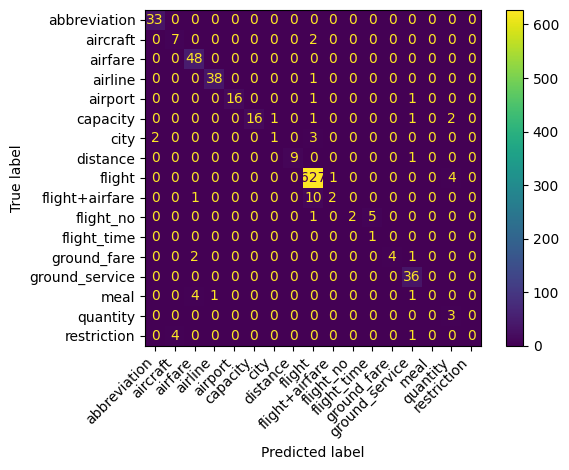

In [76]:
# Confusion matrix
conf_matrix_bert = confusion_matrix(y_test_labels, y_test_preds)
disp_bert = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_bert, display_labels=label_encoder.classes_)
disp_bert.plot(cmap="viridis")

# Rotate the x-axis labels
plt.xticks(rotation=45, ha='right')  # Rotate labels and align to the right
plt.tight_layout()  # Adjust layout to fit rotated labels
plt.show()


# Results

                 Model  Accuracy  F1 Score
0          Naive Bayes  0.797765  0.731498
1  Logistic Regression  0.871508  0.831416
2                  CNN  0.907263  0.888753
3                 BERT  0.941899  0.931657


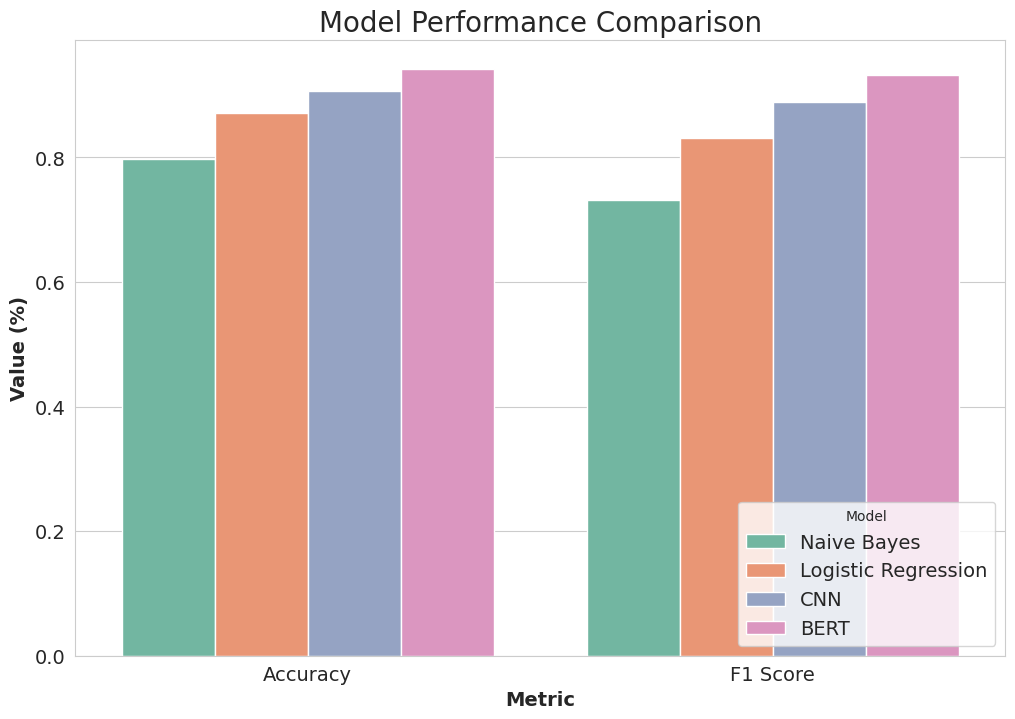

In [79]:
# Function to print model performance
def print_model_performance(model_names, y_true, y_preds):
    """
    Prints the accuracy and F1 score of multiple models in a table format.

    Args:
        model_names: List of model names.
        y_true: True labels (test set).
        y_preds: List of model predictions (test set) for each model.
    """
    accuracy_list = []
    f1_list = []

    # Evaluate each model
    for y_pred in y_preds:
        accuracy = accuracy_score(y_true, y_pred)  # Calculate accuracy
        f1 = f1_score(y_true, y_pred, average='weighted')  # Weighted F1 score for multi-class

        accuracy_list.append(accuracy)
        f1_list.append(f1)

    # Create DataFrame to display results
    performance_df = pd.DataFrame({
        'Model': model_names,
        'Accuracy': accuracy_list,
        'F1 Score': f1_list
    })

    # Print performance summary
    print(performance_df)

    return performance_df

# Example usage
model_names = ['Naive Bayes', 'Logistic Regression', 'CNN', 'BERT']  # List of model names
y_preds = [y_test_pred, y_pred_logreg, y_pred_cnn, y_test_preds]  # Model predictions (replace with actual variables)
y_true = y_test_class  # True labels

# Print performance table
performance_df = print_model_performance(model_names, y_true, y_preds)

# Prepare the data for plotting
df_melted = performance_df.melt(id_vars='Model', value_vars=['Accuracy', 'F1 Score'], var_name='Metric', value_name='Value')

# Grouped bar chart
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(12, 8))  # Increase the figure size
sns.barplot(x='Metric', y='Value', hue='Model', data=df_melted, palette='Set2', ax=ax)

# Setting the title and labels
ax.set_title('Model Performance Comparison', fontsize=20)
ax.set_xlabel('Metric', fontsize=14, fontweight='bold')
ax.set_ylabel('Value (%)', fontsize=14, fontweight='bold')

ax.tick_params(axis='both', labelsize=14)

# Add a legend
ax.legend(title='Model', fontsize=14, loc="lower right")

# Show the plot
plt.show()


- In this project, the pipeline integrates traditional machine learning models (such as Naive Bayes and Logistic Regression) with more advanced deep learning models (like CNN and BERT).
- It offers a comprehensive approach to training and evaluating intent classification models, efficiently managing preprocessing, and model assessment.

Anbu Ezhilmathi Nambi

G33350186